In [6]:
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

print("Setup Complete")

Setup Complete


<Axes: xlabel='Size (1000 sq. ft)', ylabel='Price (1000s of dollars)'>

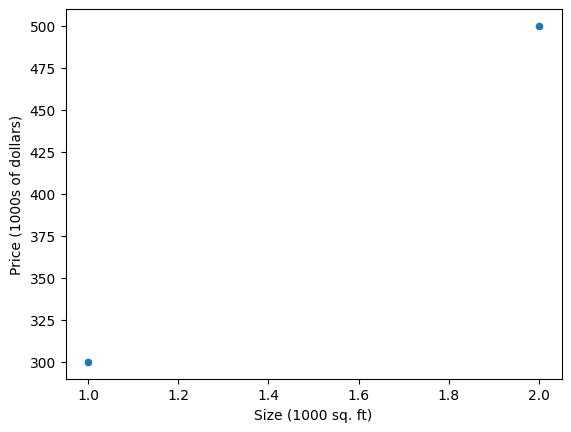

In [7]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  # (size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # (price in 1000s of dollars)

df = pd.DataFrame(
    {
        "Size (1000 sq. ft)": X_train.flatten(),
        "Price (1000s of dollars)": Y_train.flatten(),
    }
)

sns.scatterplot(data=df, x="Size (1000 sq. ft)", y="Price (1000s of dollars)")

In [8]:
linear_layer = tf.keras.layers.Dense(
    units=1,
    activation="linear",
)

In [9]:
linear_layer.get_weights()

[]

In [10]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)

tf.Tensor([[-0.28430045]], shape=(1, 1), dtype=float32)


In [11]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.28430045]], b=[0.]


In [12]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [13]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [14]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

In [16]:
prediction_tf

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

In [17]:
X_train = np.array([0.0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix

<Axes: >

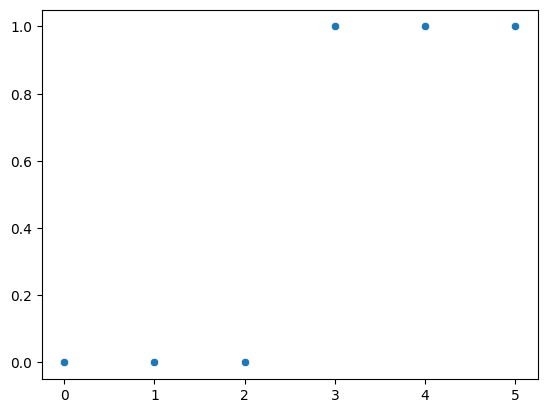

In [23]:
sns.scatterplot(x=X_train.flatten(), y=Y_train.flatten())

In [24]:
model = Sequential(
    [tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid", name="L1")]
)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
logistic_layer = model.get_layer("L1")
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.67077124]] [0.]
(1, 1) (1,)


In [27]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [29]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


alog = sigmoid(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)
print(alog)

1/1 [==============================] - 0s 12ms/step
[[0.01098694]]
[[0.01098694]]
